In [ ]:
## @see https://www.kaggle.com/toorkp/churn-wsdm/data

In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
import pandas as pd
import time
import gc; gc.enable()
import time
import sys

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score, log_loss, confusion_matrix

from collections import Counter
from numpy.random import RandomState
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

pd.options.display.float_format = "{:.2f}".format
np.set_printoptions(precision=4)

import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('modules')

from shared_functions import *
import pickle
from datetime import datetime

/home/anaconda/envs/py373/lib/python3.7/site-packages/pyparsing.py:2927: FutureWarning: Possible set intersection at position 3
  self.re = re.compile( self.reString )
/home/anaconda/envs/py373/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# Load the pre-split data

store = pd.HDFStore('/home/dissertation/data/base_abt_split.h5')
X_train, X_test, y_train, y_test = store['X_train'], store['X_test'], store['y_train'], store['y_test']
store.close()

# Drop msno from the dataset
X_train.drop(['msno', 'registration_init_time', 'registration_init_time_dt'], inplace=True, axis=1)
X_test.drop(['msno', 'registration_init_time', 'registration_init_time_dt'], inplace=True, axis=1)

print("Train Shape:", X_train.shape, y_train.shape)
print("Train Shape:", X_test.shape, y_test.shape)
X_train.head()

Train Shape: (600803, 13) (600803,)
Train Shape: (257487, 13) (257487,)


city  bd registered_via  total_order  payment_method_id_mode  \
703741    4  32              3           22                      33   
228194   13  33              3           19                      39   
735733   15  22              3           17                      40   
774256    1   0              7           26                      41   
282188    1   0              7           27                      41   

        payment_method_id_count  payment_plan_days_mode  \
703741                        1                      30   
228194                        1                      30   
735733                        3                      30   
774256                        1                      30   
282188                        1                      30   

        payment_plan_days_mean  plan_list_price_mean  plan_lifetime_value  \
703741                   21.82                108.36              2384.00   
228194                   28.58                141.16              2682.00   
735733                   30.00                158.12              2688.00   
774256                   28.85                143.27              3725.00   
282188                   28.89                132.00              3564.00   

        is_auto_renew_mode  transaction_date_max  cancel_times  
703741                True              20170228             0  
228194                True              20170131             0  
735733                True              20170210             4  
774256                True              20170205             0  
282188                True              20170216             1

In [4]:
RANDOM_STATE = 42 
CV_ITER = None
SCORING_METRIC = autosklearn.metrics.recall
BASE_NAME = "askbasic_" + str(CV_ITER) + "cv_" + str(SCORING_METRIC)
N_JOBS = 6

## Set the list of the categorical columns in the dataset
cat_col = ['city', 'registered_via', 'payment_method_id_mode']

df_cols = X_train.columns
feat_types =  ['Categorical' if col in cat_col else 'Numerical' for col in df_cols]

## Each entry in the list is a Tuple of
##   [ModelName, Model, HyperParams, ScoringMetric]
 
    
    random_state=RANDOM_STATE 
    random_state=RANDOM_STATE
    random_state=RANDOM_STATE
    random_state=RANDOM_STATE
    random_state=RANDOM_STATE
    
classifiers = [
        ('ASKLEARN_.25_' + BASE_NAME, 
         autosklearn.classification.AutoSklearnClassifier(
                time_left_for_this_task=int(3600*.25), 
                n_jobs=N_JOBS,
                include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
                                    "liblinear_svc", "xgradient_boosting"], 
                exclude_estimators=None,
                include_preprocessors=["no_preprocessing", ], 
                exclude_preprocessors=None,
                ml_memory_limit = 3072*4), {}, 
         SCORING_METRIC),
        ('ASKLEARN_.5_' + BASE_NAME, 
         autosklearn.classification.AutoSklearnClassifier(
                time_left_for_this_task=int(3600*.5), 
                n_jobs=N_JOBS,
                include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
                                    "liblinear_svc", "xgradient_boosting"], 
                exclude_estimators=None,
                include_preprocessors=["no_preprocessing", ], 
                exclude_preprocessors=None,
                ml_memory_limit = 3072*4), {}, 
         SCORING_METRIC),
#         ('ASKLEARN_1_' + BASE_NAME, 
#          autosklearn.classification.AutoSklearnClassifier(
#                 time_left_for_this_task=int(3600*1), 
#                 n_jobs=N_JOBS,
#                 include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
#                                     "liblinear_svc", "xgradient_boosting"], 
#                 exclude_estimators=None,
#                 include_preprocessors=["no_preprocessing", ], 
#                 exclude_preprocessors=None,
#                 ml_memory_limit = 3072*4), {}, 
#          SCORING_METRIC),
#         ('ASKLEARN_2_' + BASE_NAME, 
#          autosklearn.classification.AutoSklearnClassifier(
#                 time_left_for_this_task=int(3600*2), 
#                 n_jobs=N_JOBS,
#                 include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
#                                     "liblinear_svc", "xgradient_boosting"], 
#                 exclude_estimators=None,
#                 include_preprocessors=["no_preprocessing", ], 
#                 exclude_preprocessors=None,
#                 ml_memory_limit = 3072*4), {}, 
#          SCORING_METRIC),
#         ('ASKLEARN_6_' + BASE_NAME, 
#          autosklearn.classification.AutoSklearnClassifier(
#                 time_left_for_this_task=int(3600*6), 
#                 n_jobs=N_JOBS,
#                 include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
#                                     "liblinear_svc", "xgradient_boosting"], 
#                 exclude_estimators=None,
#                 include_preprocessors=["no_preprocessing", ], 
#                 exclude_preprocessors=None,
#                 ml_memory_limit = 3072*2), {}, 
#          SCORING_METRIC),
#         ('ASKLEARN_12_' + BASE_NAME, 
#          autosklearn.classification.AutoSklearnClassifier(
#                 time_left_for_this_task=int(3600*12), 
#                 n_jobs=N_JOBS,
#                 include_estimators=["random_forest", "decision_tree", "adaboost", "gaussian_nb",
#                                     "liblinear_svc", "xgradient_boosting"], 
#                 exclude_estimators=None,
#                 include_preprocessors=["no_preprocessing", ], 
#                 exclude_preprocessors=None,
#                 ml_memory_limit = 3072*2), {}, 
#          SCORING_METRIC)
]

In [5]:
all_metrics = pd.DataFrame()
all_results = list()

### Experiment 1.1 Baseline - Default Settings - No sampling

Model Build Iteration 0
PRE-SAMPLING: (600803, 13) (600803,) Counter({0: 544661, 1: 56142})
POST-SAMPLING: (600803, 13) (600803,) Counter({0: 544661, 1: 56142})
Set the train df types correctly based on the test set
Applying normalisation to train and test sets
Categorical columns in dataset ['city', 'registered_via', 'payment_method_id_mode']
Categorical columns in dataset ['city', 'registered_via', 'payment_method_id_mode']
X_train:  (600803, 68) (600803, 1)
X_test:  (257487, 68) (257487, 1)


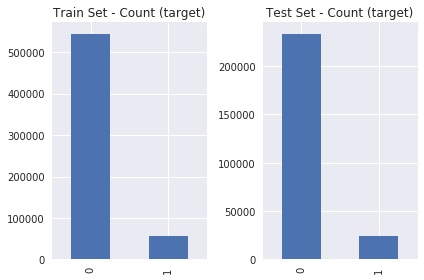

Training ASKLEARN_.25_askbasic_Nonecv_recall classifier
No params set, using Standard training


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:18:52,213:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:18:52,381:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:18:54,411:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:18:56,496:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:18:58,505:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:00,513:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:02,525:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:04,552:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:19:06,560:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:08,642:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:10,669:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:12,696:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:14,708:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:15,089:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-08-06 00:19:15,089:smac.intensification.intensification.Intensifier] Challenger was the same a

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:19:36,912:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:38,933:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:40,971:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:42,980:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:45,008:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:47,024:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:19:49,047:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

[WARNING] [2019-08-06 00:30:37,908:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] Memory Exception -- restart with less ensemle_nbest: 25


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

-1
['/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000000.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000001.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000002.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000003.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000004.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000005.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000006.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000007.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000008.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000009.ensemble', '/tmp/autosklearn_tmp_14972_5258/.auto-sklearn/ensembles/1791095845.0000000010.ensemble', '/tmp/

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:34:56,544:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:34:56,715:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:34:58,749:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:00,781:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:02,797:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:04,825:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:06,890:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:08,909:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:10,925:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:35:17,059:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:18,943:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-08-06 00:35:18,943:smac.intensification.intensification.Intensifier] Challenger was the same as the current incumbent; Skipping challenger
[WARNING] [2019-08-06 00:35:19,084:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:21,100:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:23,129:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:25,144:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No mo

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:35:29,306:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:31,321:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:33,349:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:35,377:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:37,388:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:39,416:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:41,436:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)


[WARNING] [2019-08-06 00:35:55,745:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:57,761:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:35:59,795:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:36:01,800:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:36:03,823:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:36:05,848:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than random - using Dummy Score!
[WARNING] [2019-08-06 00:36:07,868:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] No models better than

/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

[WARNING] [2019-08-06 00:51:17,041:EnsembleBuilder(1791095845):0dd3e4e45aa5507e5d58e2d0731a3935] Memory Exception -- restart with less ensemle_nbest: 25


/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/site-packages/autosklearn/evaluation/train_evaluator.py:197: RuntimeWarning: Mean of empty slice
  Y_train_pred = np.nanmean(Y_train_pred_full, axis=0)
/home/anaconda/envs/py373/lib/python3.7/

-1
['/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000000.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000001.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000002.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000003.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000004.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000005.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000006.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000007.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000008.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000009.ensemble', '/tmp/autosklearn_tmp_14972_8892/.auto-sklearn/ensembles/1791095845.0000000010.ensemble', '/tmp/

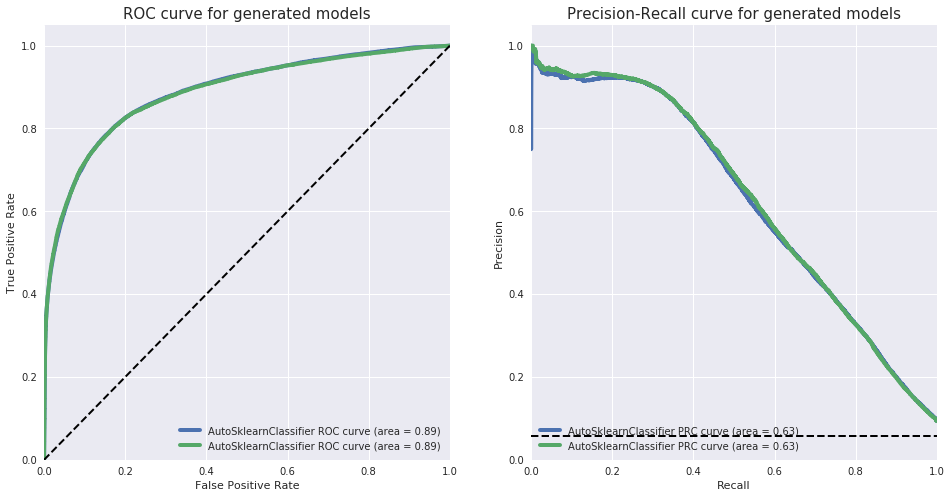

CPU times: user 5min 48s, sys: 33 s, total: 6min 21s
Wall time: 47min 14s


In [6]:
%%time
start = time.time()

sampler = ('None', DummySampler())

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

In [7]:
all_metrics

label             classifier sampling_method  \
0  ASKLEARN_.25_askbasic_Nonecv_recall  AutoSklearnClassifier            None   
0   ASKLEARN_.5_askbasic_Nonecv_recall  AutoSklearnClassifier            None   

       tn     fn    tp    fp  accuracy  precision  recall  ...  log_loss  \
0  231403  14646  9415  2023      0.94       0.82    0.39  ...      2.24   
0  231223  14417  9644  2203      0.94       0.81    0.40  ...      2.23   

   train_time  cv_time  aucroc  auprc  balanced_accuracy  cv_score_mean  \
0      965.60     0.00    0.89   0.63               0.69             -1   
0     1865.54     0.00    0.89   0.63               0.70             -1   

   cv_score_std model_churn_cost sample  
0            -1          8466800      0  
0            -1          8393200      0  

[2 rows x 22 columns]

In [ ]:
all_metrics.sort_values('f1_score', ascending=False)

### Experiment 1.2 Baseline - Default Settings - Oversampled training set 100%

In [ ]:
%%time
start = time.time()

sampler = ('ROS 1:1', RandomOverSampler(random_state=RANDOM_STATE))

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

### Experiment 1.3 Baseline - Default Settings - Undersampled training set

In [ ]:
%%time
start = time.time()

sampler = ('RUS 1:1', RandomUnderSampler(random_state=RANDOM_STATE))

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

In [ ]:
all_results

### Experiment 1.4 Baseline - Default Settings - Over sampling - 33% of majority size

In [ ]:
%%time
start = time.time()

sampler = ('ROS 3:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/3))

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

### Experiment 1.5 Baseline - Default Settings - Over sampling - 66% of majority size

In [ ]:
%%time
start = time.time()

sampler = ('ROS 3:2', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 2/3))

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

### Experiment 1.6 Baseline - Default Settings - Over sampling - 50% of majority size

In [ ]:
%%time
start = time.time()

sampler = ('ROS 2:1', RandomOverSampler(random_state=RANDOM_STATE, sampling_strategy = 1/2))

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

### Experiment 1.7 Baseline Default Settings SMOTE-NC

In [ ]:
%%time
start = time.time()

sampler = ('SMOTE_NC', SMOTENC(random_state=RANDOM_STATE, categorical_features=[0,1,2,3,4,5,6,7,12,13], n_jobs=8))

## Keep the following, essentially dropping the dt columns
cols = ['is_churn', 'city', 'bd', 'registered_via', 'total_order',
       'payment_method_id_mode', 'payment_method_id_count',
       'payment_plan_days_mode', 'payment_plan_days_mean',
       'plan_list_price_mean', 'plan_lifetime_value', 'actual_amount_mean',
       'total_actual_amount', 'is_auto_renew_mode', 'cancel_times']

exp_metrics, model_results = perform_experiment(X_train, X_test, y_train, y_test, classifiers, sampler, 1, \
                                                cv_iter=CV_ITER, cat_col=cat_col)

all_metrics = all_metrics.append(exp_metrics)
all_results.append((sampler[0]+"_"+BASE_NAME, exp_metrics, model_results))

log("basic, autosklearn, {0}, {1}".format(sampler[0], time.time()-start), 'Basic_Autosklearn.log')

In [ ]:
all_metrics.sort_values('aucroc', ascending=False).head(15)

In [ ]:
#store(all_results, 'Asklearn_Default_Undersample.pickle')

# Write (overwrite) the file to store the experiment results
with open('Asklearn_Default_Undersample.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    print("Writing results to", f.name)
    pickle.dump(all_results, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
## Just try an SVM 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [ ]:
%%time
model_train_results = train_model(base_dataset, sampling_method = 'under', classifiers = [('SGDClassifier', SGDClassifier(loss='log'))])

In [ ]:
## Print the feature importance 

feature_index = np.flip(np.argsort(model.feature_importances_), axis=0)
ordered_features = []
column_names = X_test.columns

for i in feature_index[0:10]:
    print(np.round(model.feature_importances_[i], 3), ' --> ', column_names[i])
    ordered_features.append(column_names[i])

In [ ]:
## Print the permutation importance 

import eli5
from eli5.sklearn import PermutationImportance

_, X_test, _, y_test = prepare_train_test_split(model_dataset, 0)

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

eli5.show_weights(perm, feature_names = X_test.columns.tolist())

In [ ]:
#model_name, model = model_train_results[1][2]

for model_name, model in model_train_results[1]:
    probs = model.predict_proba(X_test)[:, 1]
    pr_data = plot_precision_recall(
        y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='PR Curve for {0}'.format(model_name))

In [ ]:
pr_data = plot_roc(
    y_test, probs, title='ROC Curve for {0}'.format(model_name))

In [ ]:
print(plt.style.available)

In [ ]:
model_dataset.head()

In [ ]:
print("Original Data distribution")
print(model_dataset['is_churn'].value_counts())

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Down Sampled data set')
train_downsample = undersampled_dataset(model_dataset, 'is_churn')

print(train_downsample['is_churn'].value_counts())
print("Num records = ", train_downsample.shape[0])
train_downsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
# Display new class counts
print('Sci-Kit Learn : resample : Up Sampled data set')
train_upsample = oversampled_dataset(model_dataset, 'is_churn')

print(train_upsample['is_churn'].value_counts())
print("Num records = ", train_upsample.shape[0])
train_upsample.is_churn.value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
probs = model.predict_proba(X_test)[:, 1]
pr_data = plot_precision_recall(
    y_test, probs, title='Precision-Recall Curve for Random Forest')

In [ ]:
precision_above = pr_data.loc[pr_data['precision'] >= 0.25].copy()
precision_above.sort_values('recall', ascending=False, inplace=True)
precision_above.head()

In [ ]:
threshold_required = 0.5
# Make predictions where probability is above threshold
preds = np.zeros(len(y_test))
preds[probs >= threshold_required] = 1

# Make and plot confusion matrix
cm = confusion_matrix(y_test, preds)
plot_confusion_matrix(cm, classes=['No Churn', 'Churn'],
                      title='Churn Confusion Matrix')

In [ ]:
model_dataset.head()

In [ ]:
fi = pd.DataFrame({'importance': model.feature_importances_}, index=model_dataset.iloc[:, 1:].columns).\
    sort_values('importance', ascending=False)
fi.head(10)